# Exploring trial 1 of Shallow CNN

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from braindecode.torch_ext.util import set_random_seeds, np_to_var
set_random_seeds(seed=20190706, cuda=True)

path_to_class="/home/gari/Desktop/master_tesis_v3/MLDiagnosisTool/Classes/"

if not path_to_class in sys.path:
    sys.path.append(path_to_class)
    
sys.path.append("/home/gari/Desktop/master_tesis_v3/")    
from OFHandlers import OFHandlers as OFH

In [4]:
experiment="brain_code"
data_co="/home/gari/Desktop/master_tesis_v3/Data/Datasets_"
#train_set_full=data_co+experiment+"/prepared_train_data_set.file"
data_ses_test=OFH.load_object(data_co+experiment+"/prepared_test_data_set.file")

#shallow_cnn=OFH.load_object(data_co+experiment+"shallow_cnn.file")

In [3]:
shallow_cnn.epochs_df

,train_loss,valid_loss,train_misclass,valid_misclass,runtime
0,5.521031,5.620422,0.497041,0.50,0.000000
1,1.666033,2.514325,0.431953,0.46,26.931636
2,1.793917,2.514325,0.436181,0.46,33.953752


In [5]:
test_set=data_ses_test

In [6]:
#from torch import exp as expo_t
#from torch import log as log_t

inputs_0=test_set.X
targets_0=test_set.y

#inputs = inputs[:, :, :, None]
#input_vars = np_to_var(inputs, pin_memory=False).cuda()
#target_vars = np_to_var(targets, pin_memory=False).cuda()



In [6]:
prediction=[]
for i in range(0,len(inputs_0)):
#for i in range(0,8):
    #print(i)
    inputss=inputs_0[i:i+1]
    inputs = inputss[:, :, :, None]
    input_vars = np_to_var(inputs, pin_memory=False).cuda()
    #target_vars = np_to_var(targets, pin_memory=False).cuda()
    #print(outputs)
    outputs = shallow_cnn.model(input_vars)
    #print("aqui",log_t(outputs))
    #print(outputs)
    #max_index = outputs.max(dim = 1)[0]
    single_pred=outputs[0].cpu().detach().numpy()[0]
    print(single_pred)
    prediction.append(single_pred)

-0.70891273
-0.14287007
-0.26651913
-0.17337656
-2.9558525
-0.5367384
-0.9508581
-1.6085647
-3.4848082
-3.3230267
-9.349697
-10.765377
-10.793573
-14.487221
-13.289467
-1.394409
-0.0022425652
-0.037714243
-0.0024812222
-0.027298808
-10.834586
-7.8037786
-6.681273
-7.891939
-5.234772
-9.129394
-9.57902
-9.09029
-8.142886
-9.21049
-0.34732705
-0.12642026
-0.05622995
-0.18432379
-0.30009723
-1.9575505
-0.02871263
-1.905524
-0.111994505
-1.4524889
-2.5920525
-3.217143
-0.07167268
-5.9239073
-4.959364
-8.456575
-8.022472
-5.0847898
-7.8446383
-6.967303
-3.542399
-4.590929
-3.8210075
-6.4435186
-5.5374537
-2.0913053
-1.6684363
-0.56294584
-0.23538917
-0.9103429
-1.3368756
-2.1194732
-1.9316044
-3.752137
-1.4417162
-12.284233
-12.069271
-15.123417
-12.7923565
-8.738001
-5.0411224
-4.389473
-0.54134786
-2.5621793
-2.1005676
-11.064294
-6.891827
-6.1052103
-8.426828
-6.1549087
-0.11736536
-3.4638524
-0.47828153
-0.68821806
-3.13476
-5.323277
-1.2443345
-2.309644
-1.0050367
-6.812516
-0.758149
-

In [15]:
cnn_pred=np.exp(pd.DataFrame(prediction,columns=["Pred"]))
real_pred=pd.DataFrame(targets_0,columns=["Real"])

In [16]:
cnn_pred

,Pred
0,4.921790e-01
1,8.668667e-01
2,7.660413e-01
3,8.408209e-01
4,5.203428e-02
5,5.846520e-01
6,3.864093e-01
7,2.001747e-01
8,3.065964e-02
9,3.604357e-02


In [17]:
from sklearn.metrics import (roc_auc_score,
                             recall_score,
                             f1_score,
                             average_precision_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             roc_curve)
#raw_acc=accuracy_score(cnn_pred, real_pred)

In [18]:
df_id=OFH.load_object("/home/gari/Desktop/master_tesis_v2/Data/IdDataSet/df_test_identity.file")
df_subject_pred=df_id.join(cnn_pred).join(real_pred).groupby("test_patient_id").mean()
df_subject_pred.loc[df_subject_pred.Pred >= 0.5, "ajusted_decision"] = 0
df_subject_pred=df_subject_pred.fillna(1)
ajusted_acc_mean=balanced_accuracy_score(df_subject_pred.Real, df_subject_pred.ajusted_decision)
print("mean:",ajusted_acc_mean)

mean: 0.4838022165387894


In [19]:
df_subject_pred

,Pred,Real,ajusted_decision
test_patient_id,,,
NDARAA117NEJ,0.201849,0,1.0
NDARAY238DFL,0.859473,0,0.0
NDARBM839WR5,0.454421,0,1.0
NDARBV364MBC,0.500660,0,0.0
NDARCB370UK4,0.396707,0,1.0
NDARCJ475WJP,0.280744,0,1.0
NDARCR499NE4,0.001613,0,1.0
NDARCT933HF2,0.025274,0,1.0
NDARCW497XW2,0.502400,0,0.0


# Extra. Did this while writting the tesis

In [10]:
inputs_0.shape

(428, 110, 5000)

In [15]:
import pandas as pd

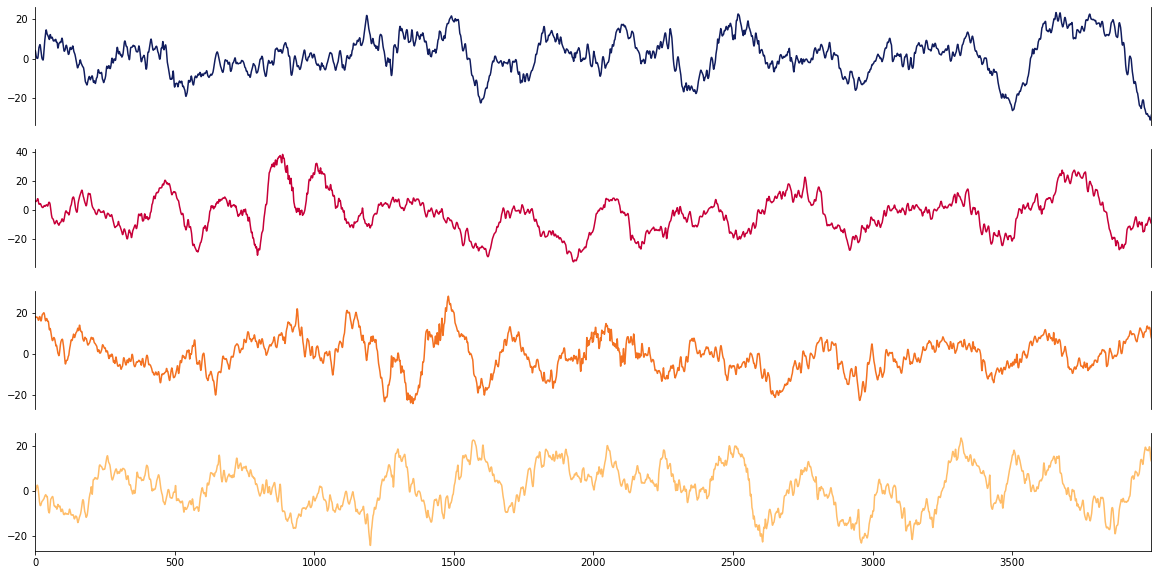

In [51]:
fig = plt.figure(figsize=(20,10))

ax0=fig.add_subplot(4,1,1)
ax1=fig.add_subplot(4,1,2)
ax2=fig.add_subplot(4,1,3)
ax3=fig.add_subplot(4,1,4)

e0=pd.DataFrame(inputs_0[0][0,1000:])
e1=pd.DataFrame(inputs_0[1][0,1000:])
e2=pd.DataFrame(inputs_0[2][0,1000:])
e3=pd.DataFrame(inputs_0[3][0,1000:])

e0.plot(kind="line",ax=ax0,color="#111d5e")
e1.plot(kind="line",ax=ax1,color="#c70039")
e2.plot(kind="line",ax=ax2,color="#f37121")
e3.plot(kind="line",ax=ax3,color="#ffbd69")
ax0.get_legend().remove()

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

ax0.spines['bottom'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax0.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax0.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
#ax3.get_xaxis().set_visible(False)

In [14]:


import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10))
plt.scatter(inputs_0[1][:,0:200]);
plt.show()




TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 1440x720 with 0 Axes>